In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline

In [36]:
innouts = gpd.read_file("../output/innout/")

In [37]:
counties = gpd.read_file("../output/counties_simple/counties_simple.shp")

# ca = counties[ counties['STATEFP'] == '06']

Merge on geometry

In [38]:
merged = gpd.sjoin(
    counties,
    innouts,
    how = "left"
)

Preview the joined dataframe

In [39]:
merged.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,index_right,address,city,latitude,longitude,state,store_numb
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.0411551894 -328619.667039162,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,680956809,61588406,+46.2946377,-123.4244583,POLYGON ((-1770686.983550074 398793.6640856052...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,011,00933054,35011,De Baca,De Baca County,6016819484,29089486,+34.3592729,-104.3686961,POLYGON ((-422754.4474200015 -1210188.44889264...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count up the stores by their county fip code. Make sure to save columns that we may count later

In [40]:
# add in a new dummy column
merged['stores_per_county'] = 0

# merge on county ANSI codes
grouped = merged.groupby("COUNTYNS").agg({
    "stores_per_county": "count", # counts stores per county
    "geometry": "first", # 'first' just makes sure we keep this columns original value
    "STATEFP": "first",
    "NAME": "first"
})

# simple way to convert a Pandas DataFrame to a GeoPandas GeoDataFrame
stores = gpd.GeoDataFrame(grouped)

Check out the top counties

In [41]:
stores.sort_values(
    "stores_per_county",
    ascending = False
).head()

,stores_per_county,geometry,STATEFP,NAME
COUNTYNS,,,,
00277283,70,(POLYGON ((-1711308.235478397 -1012808.8307699...,06,Los Angeles
00277294,27,POLYGON ((-1659395.334375121 -1090689.19713165...,06,Orange
00037026,21,POLYGON ((-1133739.049143394 -1152281.50190051...,04,Maricopa
00277301,19,POLYGON ((-1617583.108118802 -1145747.64943580...,06,San Diego
00277300,18,POLYGON ((-1606507.506836049 -971379.242417176...,06,San Bernardino


Quick plot

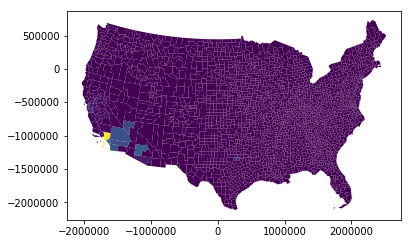

In [42]:
stores.plot(
    column = "stores_per_county"
)

Plot just California

In [43]:
# Get the max number of stores so that we can use it for our scale max
stores['stores_per_county'].max()

70

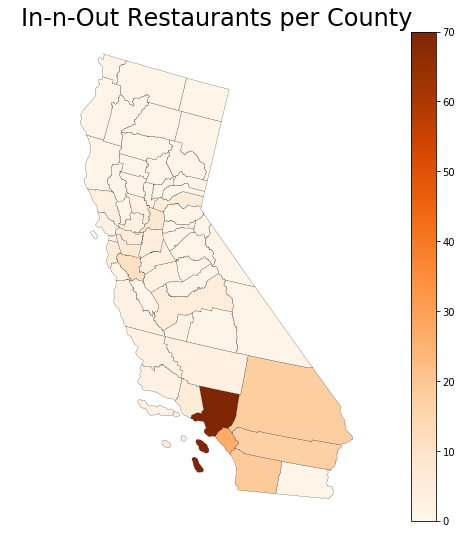

In [44]:
fig, ax = plt.subplots( figsize = (16, 9) )

ca_stores = stores[ stores['STATEFP'] == "06"]

ca_stores.plot(
    ax = ax,
    edgecolor = "black",
    linewidth = 0.2,
    legend = True,
    column = "stores_per_county",
    vmin = 0,
    vmax = 70,
    cmap = "Oranges"
)

ax.set_title("In-n-Out Restaurants per County", fontsize = 24)
ax.axis("off");


Add in the stores as points if you want

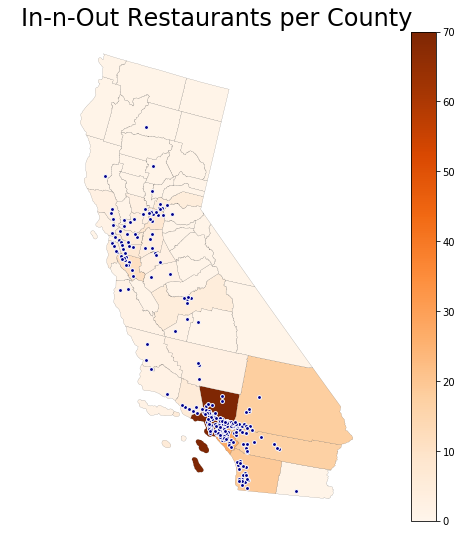

In [45]:
fig, ax = plt.subplots( figsize = (16, 9) )

ca_stores = stores[ stores['STATEFP'] == "06"]

ca_stores.plot(
    ax = ax,
    edgecolor = "black",
    linewidth = 0.1,
    legend = True,
    column = "stores_per_county",
    vmin = 0,
    vmax = 70,
    cmap = "Oranges"
)

innouts[ innouts['state'] == 'CA'].plot(
    ax = ax,
    markersize = 15,
    color = "darkblue",
    edgecolor = "white",
    linewidth = 1
)

ax.set_title("In-n-Out Restaurants per County", fontsize = 24)
ax.axis("off");
